<a href="https://colab.research.google.com/github/sana1410/British-Airlines-Customer-reviews/blob/main/British_Airlines_booking_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

Check for unique values in each categorical column

In [9]:
df['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [10]:
df['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [11]:
df['flight_day'].value_counts()

1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: flight_day, dtype: int64

In [12]:
df['route'].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [13]:
df['wants_extra_baggage'].astype('str').value_counts()

1    33439
0    16561
Name: wants_extra_baggage, dtype: int64

In [14]:
df['wants_preferred_seat'].astype('str').value_counts()

0    35152
1    14848
Name: wants_preferred_seat, dtype: int64

In [15]:
df['wants_in_flight_meals'].astype('str').value_counts()

0    28643
1    21357
Name: wants_in_flight_meals, dtype: int64

In [16]:
df['booking_complete'].astype('str').value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

Checking for null values

In [17]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

Checking for outliers

<Axes: >

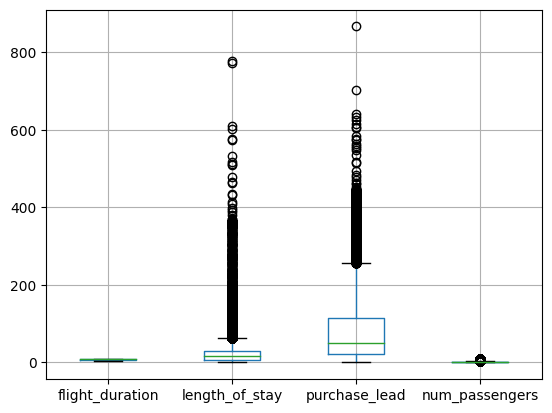

In [19]:
df[['flight_duration','length_of_stay','purchase_lead','num_passengers']].boxplot()

array([[<Axes: title={'center': 'flight_duration'}>,
        <Axes: title={'center': 'length_of_stay'}>],
       [<Axes: title={'center': 'purchase_lead'}>,
        <Axes: title={'center': 'num_passengers'}>]], dtype=object)

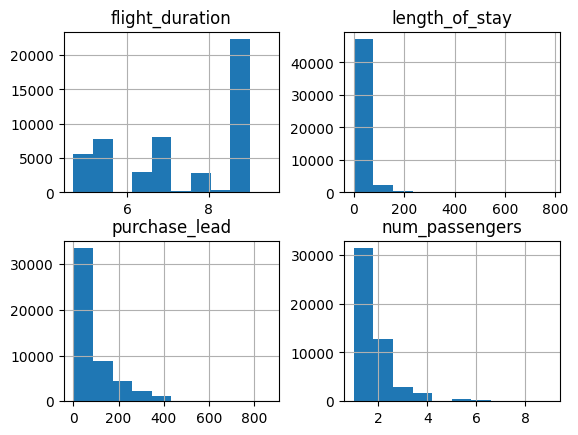

In [21]:
df[['flight_duration','length_of_stay','purchase_lead','num_passengers']].hist()

Creating new columns

In [22]:
df['weekday']=df['flight_day'].apply(lambda x: 1 if x in [1,2,3,4,5] else 0 )

In [27]:
df['AM/PM']=df['flight_hour'].apply(lambda x: 'AM' if x < 12 else 'PM' )

In [29]:
df['purchase_months']=round(df['purchase_lead']/30)

In [57]:
df['length_stay_months']=round(df['length_of_stay']/30)

In [25]:
df['weekday'].value_counts()

1    37634
0    12366
Name: weekday, dtype: int64

In [28]:
df['AM/PM'].value_counts()

AM    33287
PM    16713
Name: AM/PM, dtype: int64

In [30]:
df['purchase_months'].value_counts()

1.0     13239
0.0      9404
2.0      8684
3.0      4758
4.0      3523
5.0      2088
6.0      1923
8.0      1457
7.0      1427
9.0       935
10.0      743
11.0      628
12.0      477
13.0      383
14.0      276
15.0       33
19.0        5
16.0        4
21.0        3
20.0        3
18.0        3
17.0        2
23.0        1
29.0        1
Name: purchase_months, dtype: int64

In [59]:
df['length_stay_months'].value_counts()

0.0     24673
1.0     19313
2.0      3017
3.0      1919
4.0       345
6.0       235
5.0       205
7.0        63
12.0       60
9.0        47
8.0        39
10.0       32
11.0       31
14.0        4
13.0        4
17.0        3
20.0        2
16.0        2
26.0        2
19.0        2
18.0        1
15.0        1
Name: length_stay_months, dtype: int64

EDA

<Axes: xlabel='booking_complete', ylabel='count'>

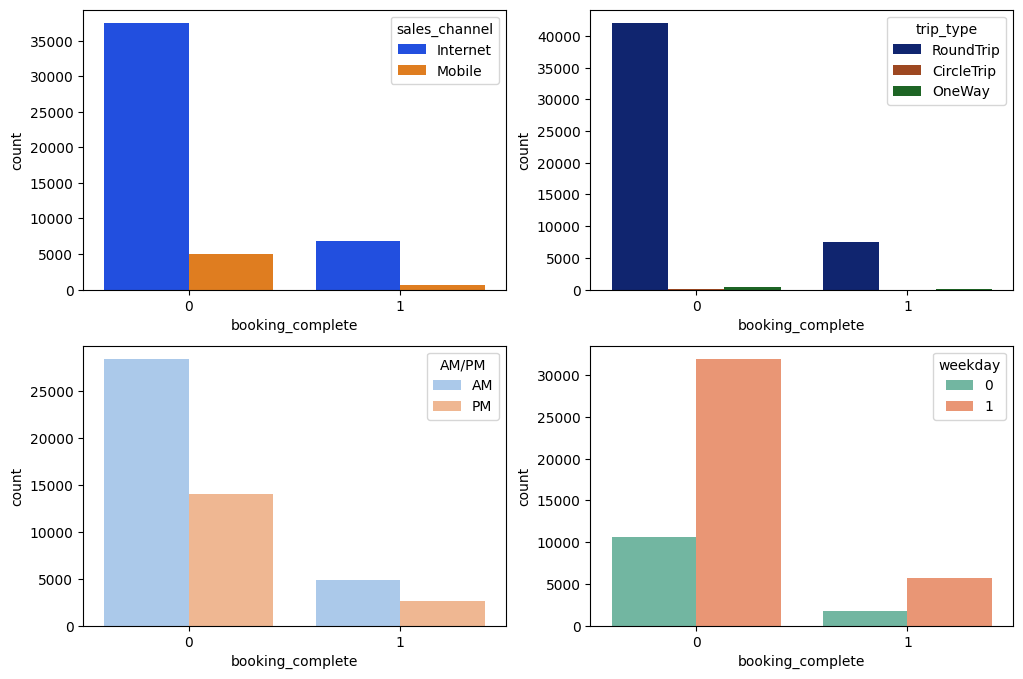

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.countplot(x=df['booking_complete'],data=df,palette='bright',hue=df['sales_channel'],ax=axes[0,0])
sns.countplot(x=df['booking_complete'],data=df,palette='dark',hue=df['trip_type'],ax=axes[0,1])
sns.countplot(x=df['booking_complete'],data=df,palette='pastel',hue=df['AM/PM'],ax=axes[1,0])
sns.countplot(x=df['booking_complete'],data=df,palette='Set2',hue=df['weekday'],ax=axes[1,1])

<Axes: xlabel='booking_complete', ylabel='count'>

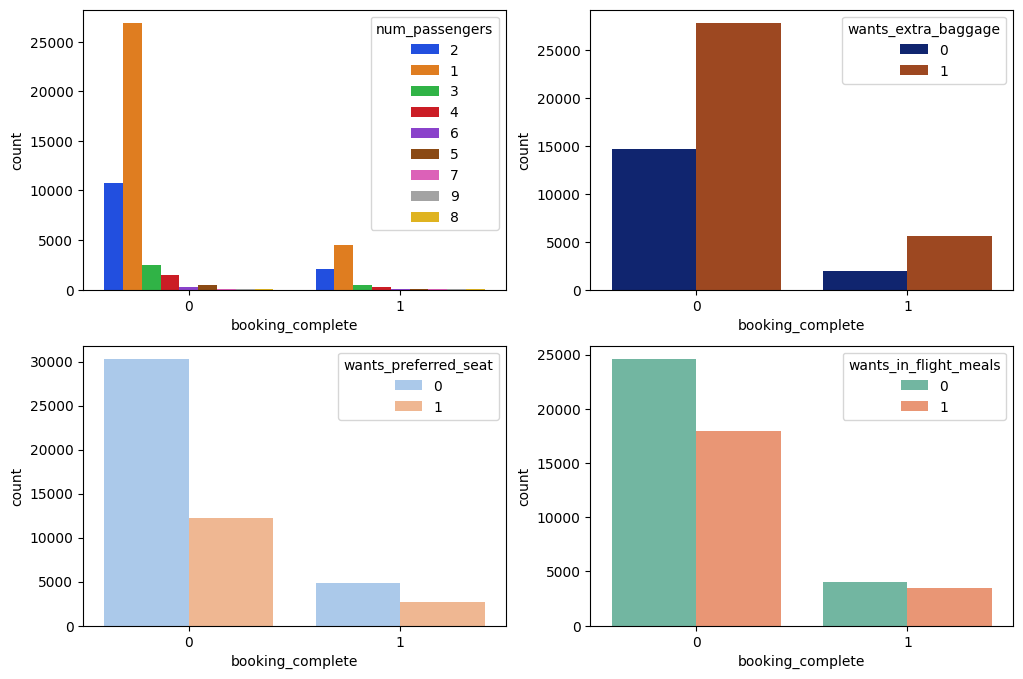

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.countplot(x=df['booking_complete'],data=df,palette='bright',hue=df['num_passengers'].astype('str'),ax=axes[0,0])
sns.countplot(x=df['booking_complete'],data=df,palette='dark',hue=df['wants_extra_baggage'],ax=axes[0,1])
sns.countplot(x=df['booking_complete'],data=df,palette='pastel',hue=df['wants_preferred_seat'],ax=axes[1,0])
sns.countplot(x=df['booking_complete'],data=df,palette='Set2',hue=df['wants_in_flight_meals'],ax=axes[1,1])

<Axes: xlabel='purchase_months'>

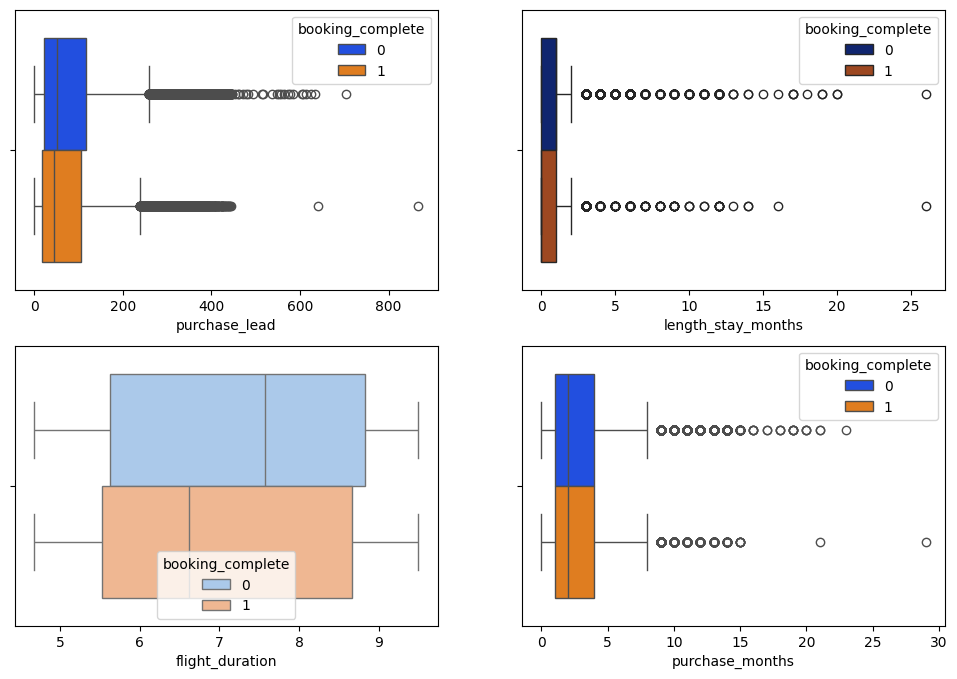

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x=df['purchase_lead'],data=df,palette='bright',hue=df['booking_complete'],ax=axes[0,0])
sns.boxplot(x=df['length_stay_months'],data=df,palette='dark',hue=df['booking_complete'],ax=axes[0,1])
sns.boxplot(x=df['flight_duration'],data=df,palette='pastel',hue=df['booking_complete'],ax=axes[1,0])
sns.boxplot(x=df['purchase_months'],data=df,palette='bright',hue=df['booking_complete'],ax=axes[1,1])

In [172]:
list=df[df['booking_complete']==1]['route'].value_counts() > 250

In [173]:
list=list[list==True]

In [174]:
routes=list.index.to_list()

In [175]:
routes

['AKLKUL', 'PENTPE']

In [180]:
list1=df[df['booking_complete']==1]['booking_origin'].value_counts() > 800

In [181]:
list1=list1[list1==True]

In [182]:
country=list1.index.to_list()

In [183]:
country

['Malaysia', 'Australia']

<Axes: xlabel='route', ylabel='count'>

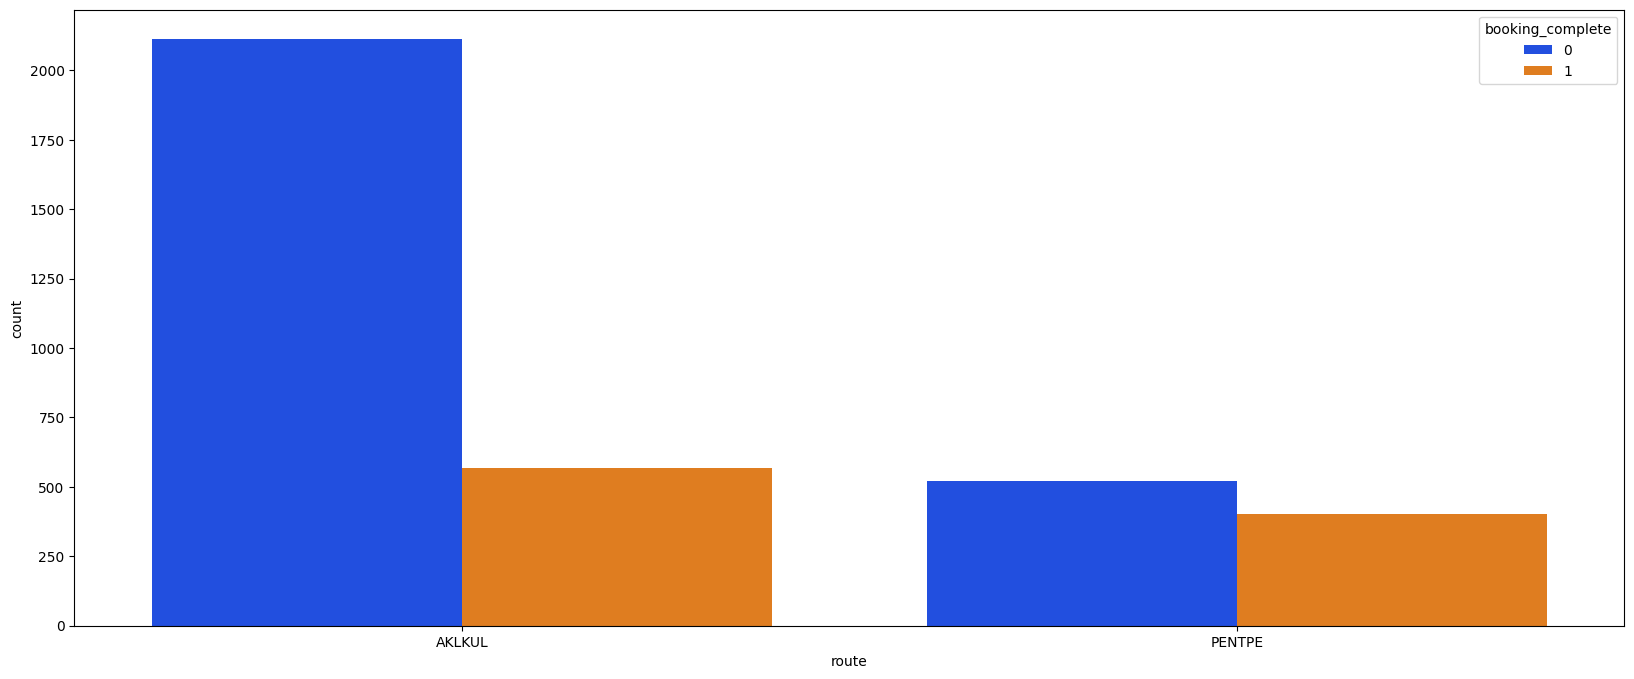

In [184]:
plt.figure(figsize=(20,8))
sns.countplot(x=df[df['route'].isin(routes)]['route'],data=df[df['route'].isin(routes)],palette='bright',hue=df['booking_complete'])


<Axes: xlabel='booking_origin', ylabel='count'>

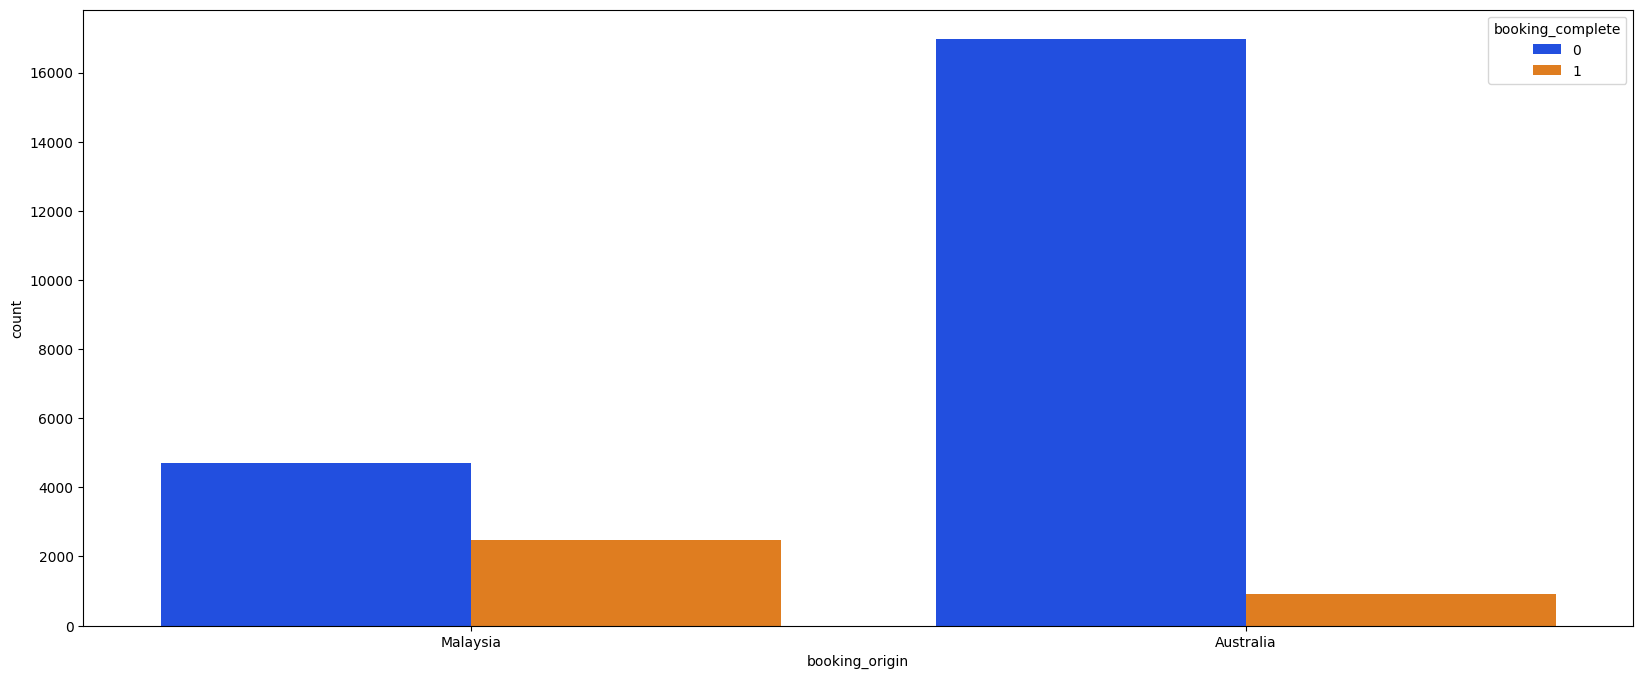

In [185]:
plt.figure(figsize=(20,8))
sns.countplot(x=df[df['booking_origin'].isin(country)]['booking_origin'],data=df[df['booking_origin'].isin(country)],palette='bright',hue=df['booking_complete'])

In [186]:
df['most_booked_routes']=df['route'].apply(lambda x:x if x in routes else 'NO' )

In [187]:
df['most_booked_routes'].value_counts()

NO        46396
AKLKUL     2680
PENTPE      924
Name: most_booked_routes, dtype: int64

In [188]:
df['top_origin_country']=df['booking_origin'].apply(lambda x:x if x in country else 'NO' )

In [189]:
df['top_origin_country'].value_counts()

NO           24954
Australia    17872
Malaysia      7174
Name: top_origin_country, dtype: int64

In [190]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,weekday,AM/PM,purchase_months,length_stay_months,most_booked_routes,top_origin_country
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,AM,9.0,1.0,NO,NO
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,AM,4.0,1.0,NO,NO
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1,PM,8.0,1.0,NO,NO
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,AM,3.0,1.0,NO,NO
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1,PM,2.0,1.0,NO,NO


converting categorical variable to numerical

In [196]:
dummy_data=pd.get_dummies(df[['AM/PM','sales_channel','trip_type','most_booked_routes','top_origin_country']])

In [198]:
dummy_data.drop(['AM/PM_PM','sales_channel_Mobile'],axis=1,inplace=True)

In [200]:
df=pd.concat([df,dummy_data],axis=1)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   num_passengers                50000 non-null  int64  
 1   sales_channel                 50000 non-null  object 
 2   trip_type                     50000 non-null  object 
 3   purchase_lead                 50000 non-null  int64  
 4   length_of_stay                50000 non-null  int64  
 5   flight_hour                   50000 non-null  int64  
 6   flight_day                    50000 non-null  int64  
 7   route                         50000 non-null  object 
 8   booking_origin                50000 non-null  object 
 9   wants_extra_baggage           50000 non-null  int64  
 10  wants_preferred_seat          50000 non-null  int64  
 11  wants_in_flight_meals         50000 non-null  int64  
 12  flight_duration               50000 non-null  float64
 13  b

In [202]:
df.drop(['AM/PM','sales_channel','trip_type','route','booking_origin'],axis=1,inplace=True)

In [209]:
df.drop(['trip_type_CircleTrip','trip_type_OneWay','most_booked_routes_NO','top_origin_country_NO'],axis=1,inplace=True)

In [213]:
df.drop(['purchase_lead','flight_hour','flight_day'],axis=1,inplace=True)

In [217]:
df.drop('length_stay_months',axis=1,inplace=True)

In [223]:
df.drop(['most_booked_routes','top_origin_country'],axis=1,inplace=True)

In [224]:
df.head()

,num_passengers,length_of_stay,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,weekday,purchase_months,AM/PM_AM,sales_channel_Internet,trip_type_RoundTrip,most_booked_routes_AKLKUL,most_booked_routes_PENTPE,top_origin_country_Australia,top_origin_country_Malaysia
0,2,19,1,0,0,5.52,0,0,9.0,1,1,1,0,0,0,0
1,1,20,0,0,0,5.52,0,0,4.0,1,1,1,0,0,0,0
2,2,22,1,1,0,5.52,0,1,8.0,0,1,1,0,0,0,0
3,1,31,0,0,1,5.52,0,0,3.0,1,1,1,0,0,0,0
4,2,22,1,0,1,5.52,0,1,2.0,0,1,1,0,0,0,0


In [225]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


                              num_passengers  length_of_stay  \
num_passengers                      1.000000       -0.115850   
length_of_stay                     -0.115850        1.000000   
wants_extra_baggage                 0.120404        0.176757   
wants_preferred_seat                0.028544        0.032264   
wants_in_flight_meals               0.022943        0.098828   
flight_duration                    -0.063169        0.141181   
booking_complete                    0.024116       -0.042408   
weekday                            -0.025070        0.004365   
purchase_months                     0.213351       -0.076908   
AM/PM_AM                           -0.017272        0.039195   
sales_channel_Internet              0.002457        0.060352   
trip_type_RoundTrip                 0.002435        0.009968   
most_booked_routes_AKLKUL           0.016145        0.069899   
most_booked_routes_PENTPE           0.013930       -0.045361   
top_origin_country_Australia       -0.10

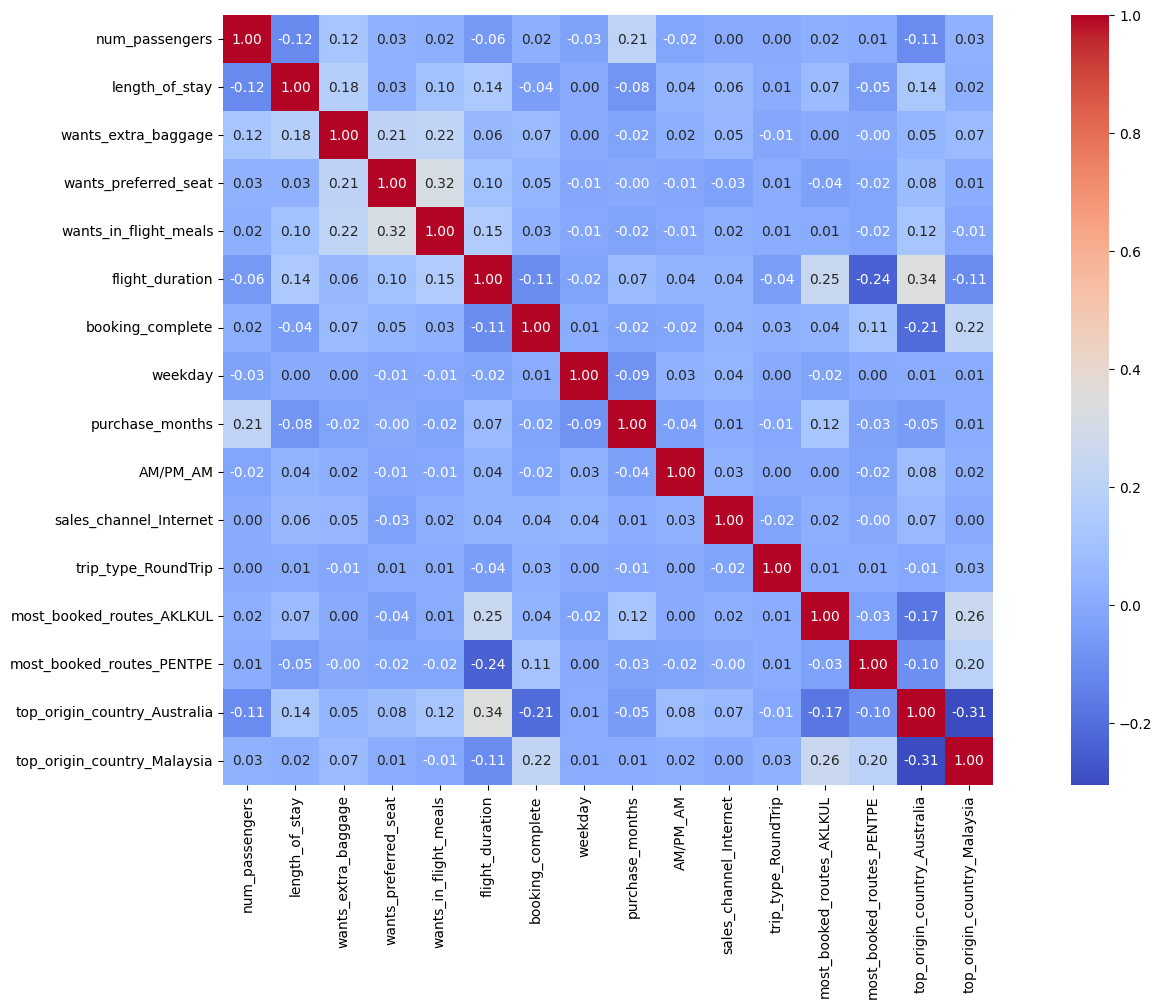

In [226]:
# prompt: plot correlation matrix

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", ax=ax, cmap="coolwarm", square=True)

# Display the heatmap
plt.show()


In [227]:
# prompt: split into test and train

from sklearn.model_selection import train_test_split

# Separate features and target
features = df.drop('booking_complete', axis=1)
target = df['booking_complete']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print('Training data shape:', X_train.shape)
print('Training target shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test target shape:', y_test.shape)


Training data shape: (40000, 15)
Training target shape: (40000,)
Test data shape: (10000, 15)
Test target shape: (10000,)


In [228]:
# prompt: write a logistic regression code

from sklearn.linear_model import LogisticRegression

# Instantiate the model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print(classification_report(y_test, y_pred))

# Feature importance
importance = model.coef_[0]

# Summarize feature importance
for i, feature in enumerate(features.columns):
  print(f'{feature}: {importance[i]}')



Accuracy: 0.8522
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      8520
           1       0.51      0.03      0.05      1480

    accuracy                           0.85     10000
   macro avg       0.68      0.51      0.49     10000
weighted avg       0.80      0.85      0.79     10000

num_passengers: 0.004623540171923452
length_of_stay: -0.0040255949388416186
wants_extra_baggage: 0.33509130992595804
wants_preferred_seat: 0.29787552183585275
wants_in_flight_meals: 0.2002304556897046
flight_duration: -0.054051879515469414
weekday: -0.04166611061953285
purchase_months: -0.02746799609276421
AM/PM_AM: -0.04344922067386702
sales_channel_Internet: 0.569982781186427
trip_type_RoundTrip: -0.48289057179284045
most_booked_routes_AKLKUL: -0.0943294456672976
most_booked_routes_PENTPE: 0.6471506466048697
top_origin_country_Australia: -1.2815882797392397
top_origin_country_Malaysia: 0.9463614459985608


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
